<a href="https://colab.research.google.com/github/Naegoya/PCVK-SYAFA/blob/main/Week5_Kelompok8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KELOMPOK 8
Nama Anggota Kelompok

1. Mirabell Joice Laura (2141720174)
2. M. Edwin Isa Alfais (2141720193)
3. Nabilah Amaalina Syafa (2141720198)



**TUGAS PRAKTIKUM**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt

# 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


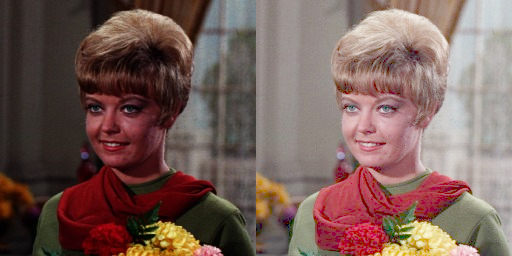

In [4]:
print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, bukan angka')

# membaca gambar dari file
gambar = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

# membuat citra kosong untuk menyimpan hasil koreksi Gamma
gamma_image = np.zeros(gambar.shape, gambar.dtype)

# melakukan koreksi Gamma per pixel pada citra
for y in range(gambar.shape[0]):
    for x in range(gambar.shape[1]):
        for c in range(gambar.shape[2]):
            # mengoreksi Gamma pada setiap saluran warna (channel)
            gamma_image[y, x, c] = np.clip(255 * (gambar[y, x, c] / 255.0) ** (1 / gamma), 0, 255)

# menggabungkan citra asli dan citra hasil koreksi Gamma secara horizontal
final_frame = cv.hconcat((gambar, gamma_image))

# menampilkan citra asli dan hasil koreksi Gamma
cv2_imshow(final_frame)


# 2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

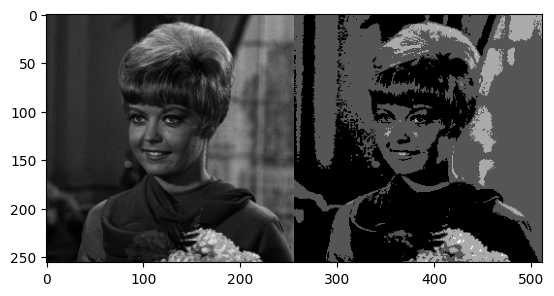

In [5]:
bit_depth = 2  # Bit depth
level = 255 / (pow(2, bit_depth) - 1)

# Akses gambar yang diinginkan
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

# Buat citra kosong untuk citra dengan bit depth yang diinginkan
depth_image = np.zeros(original.shape, original.dtype)

# Lakukan kuantisasi citra
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

# Menggabungkan citra asli dan citra hasil kuantisasi secara horizontal
final_frame = cv.hconcat((original, depth_image))

# Menampilkan citra asli dan hasil kuantisasi menggunakan Matplotlib
plt.imshow(final_frame, cmap='gray')
plt.axis('on')  # Menampilkan sumbu (axis)
plt.show()


# 3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

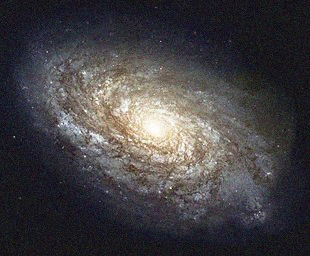

Jumlah Citra yang Di-Average: 5
Nilai PSNR: 20.90847965316854 dB
 


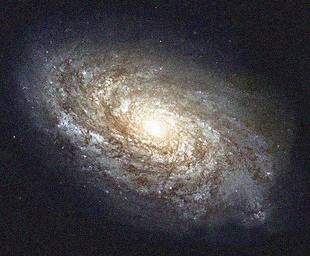

Jumlah Citra yang Di-Average: 10
Nilai PSNR: 19.474860603811077 dB
 


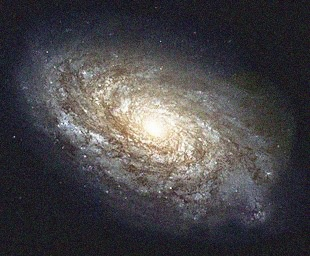

Jumlah Citra yang Di-Average: 20
Nilai PSNR: 19.448956302341934 dB
 


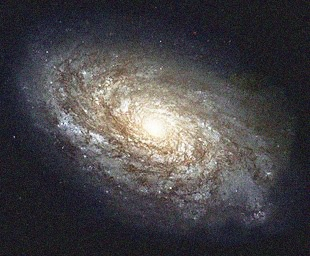

Jumlah Citra yang Di-Average: 40
Nilai PSNR: 19.436643790943616 dB
 


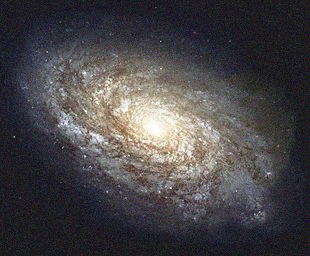

Jumlah Citra yang Di-Average: 80
Nilai PSNR: 19.444607380884648 dB
 


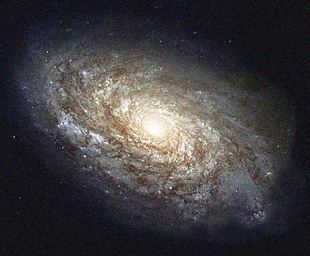

Jumlah Citra yang Di-Average: 100
Nilai PSNR: 22.543552472902405 dB
 


In [6]:
import glob

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
noise_images = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    noise = cv.imread(img_path)
    noise_images.append(noise)

# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original)

# List untuk menyimpan nilai PSNR tiap citra gabungan
psnr_values = []

# Jumlah citra yang akan di-average
jumlah_citra_di_average = [5, 10, 20, 40, 80, 100]

for jumlah_noise in jumlah_citra_di_average:
    # Mengambil n citra pertama dari list
    selected_images = noise_images[:jumlah_noise]

    # Proses penggabungan citra dengan Gaussian Noise ke citra asli dan menghitung PSNR
    for noise_image in selected_images:
        # Pastikan citra noise memiliki ukuran yang sama dengan citra asli
        noise_image = cv.resize(noise_image, (original.shape[1], original.shape[0]))

        # Lakukan penggabungan dengan operasi addWeighted
        combined_image = cv.addWeighted(combined_image, 0.7, noise_image, 0.3, 0)

    # Menghitung nilai PSNR antara citra asli dan citra gabungan
    psnr = cv.PSNR(original, combined_image)
    psnr_values.append(psnr)

    # Menampilkan citra gabungan
    cv2_imshow(combined_image)
    print(f'Jumlah Citra yang Di-Average: {jumlah_noise}')
    print(f'Nilai PSNR: {psnr} dB')
    print(' ')


# Image Masking
Kelompok 8

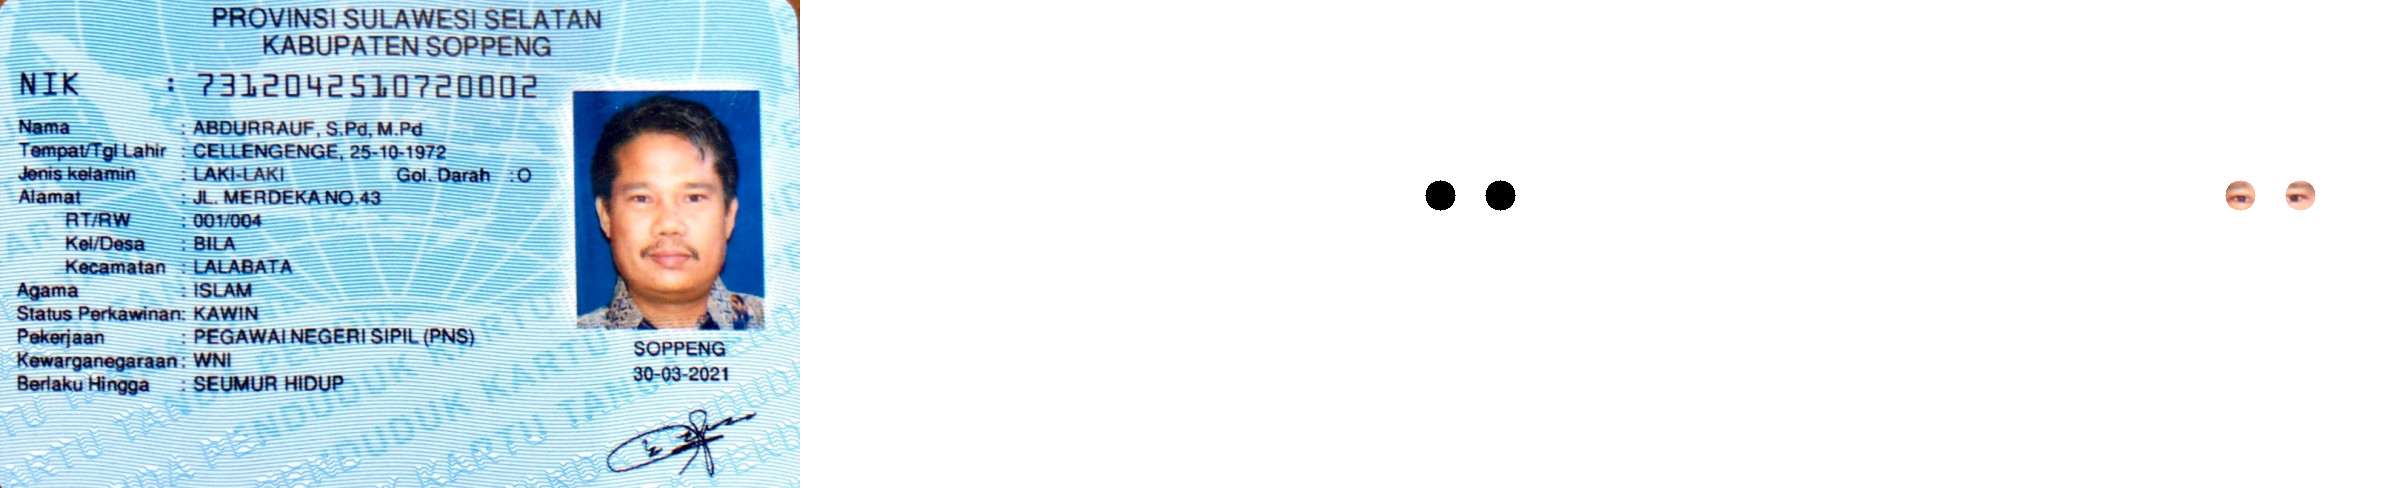

In [24]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

# Membuat gambar kosong dengan latar belakang putih
gambar_kosong = np.ones(original.shape, dtype=np.uint8) * 255

# Gambar lingkaran pertama pada gambar_kosong
cv.circle(gambar_kosong, (640, 195), 15, (0, 0, 0), -1)

# Gambar lingkaran kedua pada gambar_kosong
cv.circle(gambar_kosong, (700, 195), 15, (0, 0, 0), -1)

# Menggabungkan citra asli dengan gambar_kosong menggunakan bitwise OR
combine = cv.bitwise_or(original, gambar_kosong)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original, gambar_kosong, combine))
cv2_imshow(result)


# Menggunakan Operator lain

## NOT

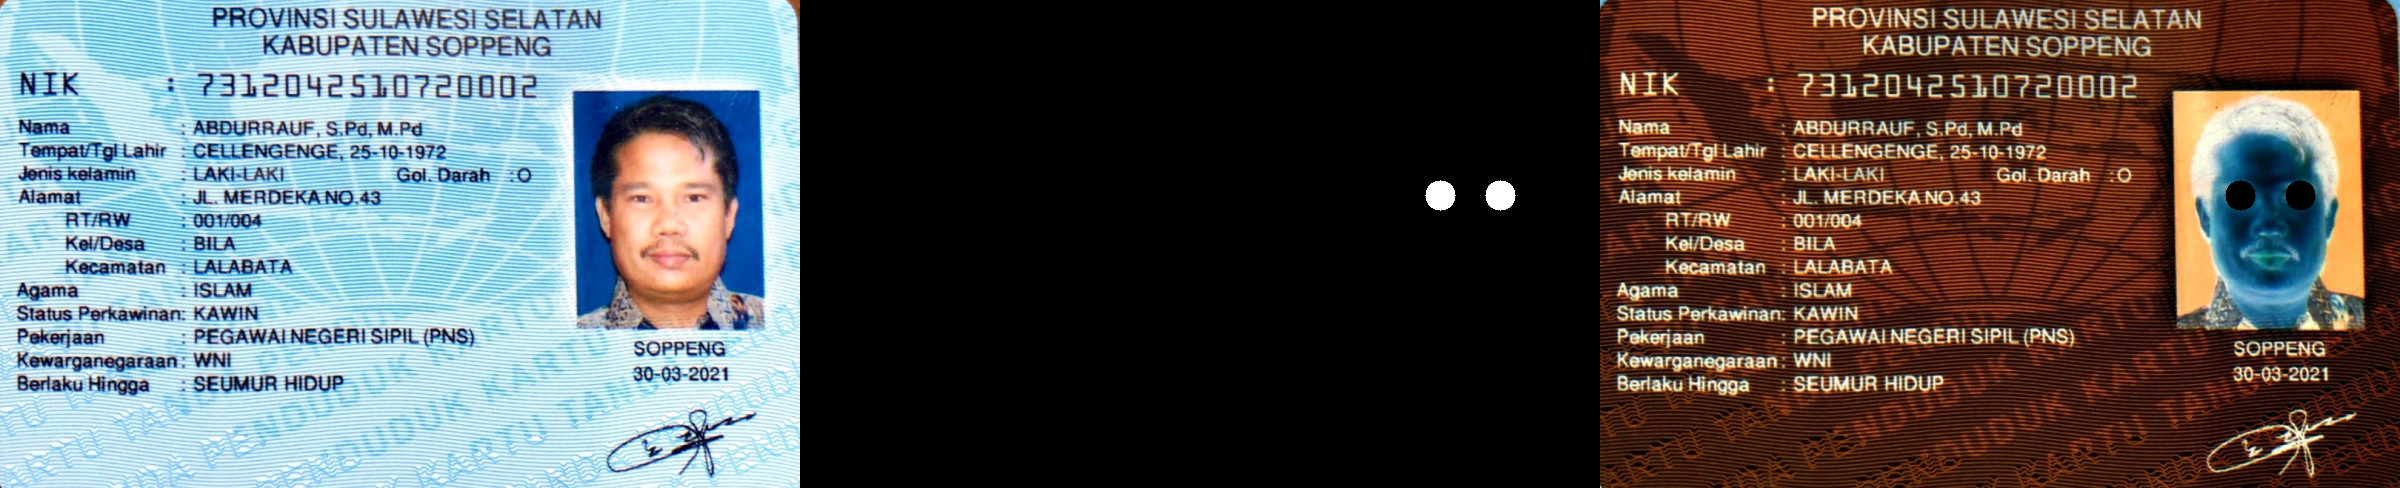

In [23]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi NOT
masked = ~original & ~mask

# Menggabungkan hasil citra asli, mask dan hasil operasi NOT
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

## OR

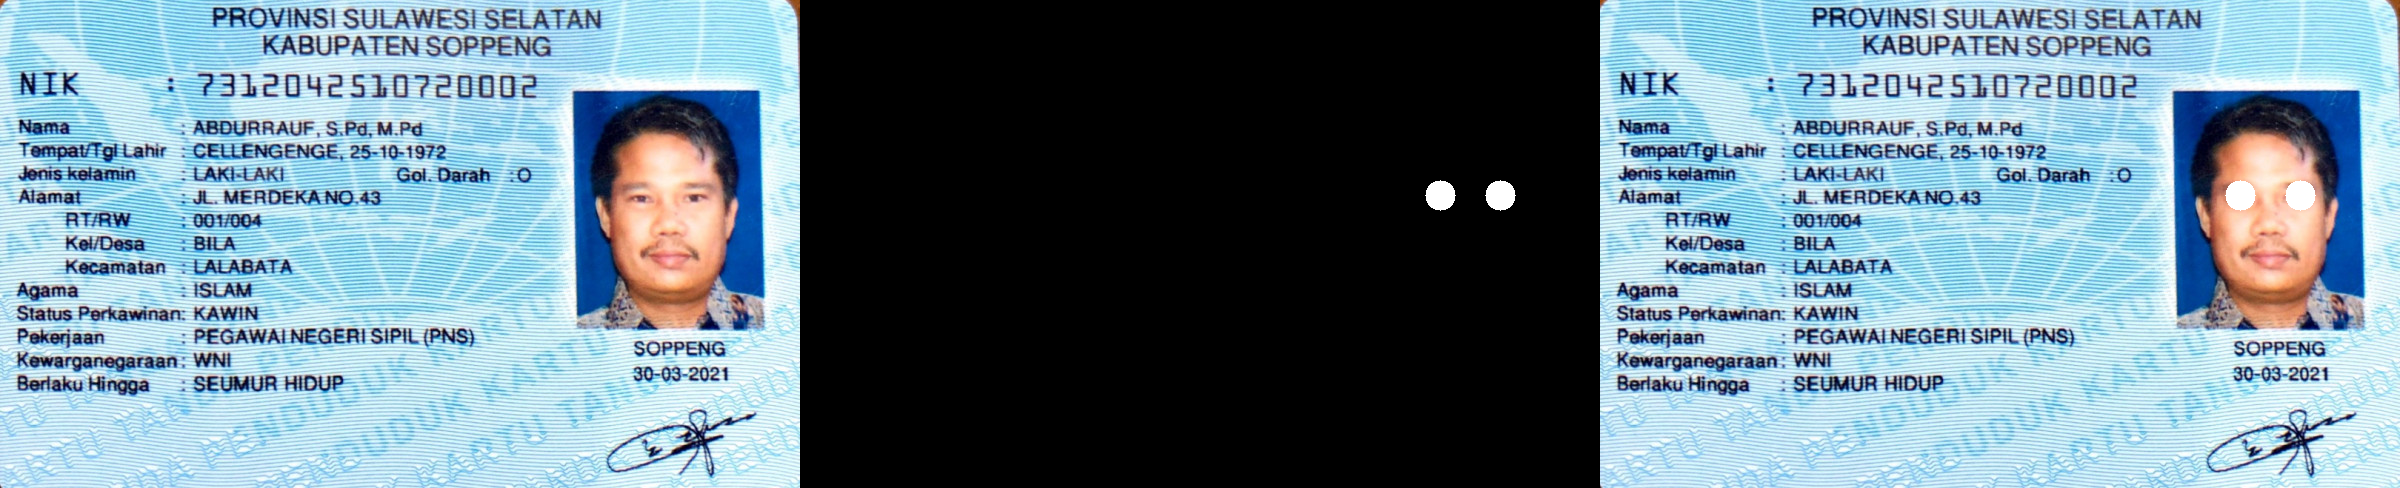

In [25]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi OR
masked = original | mask

# Menggabungkan hasil citra asli, mask dan hasil operasi OR
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

## AND

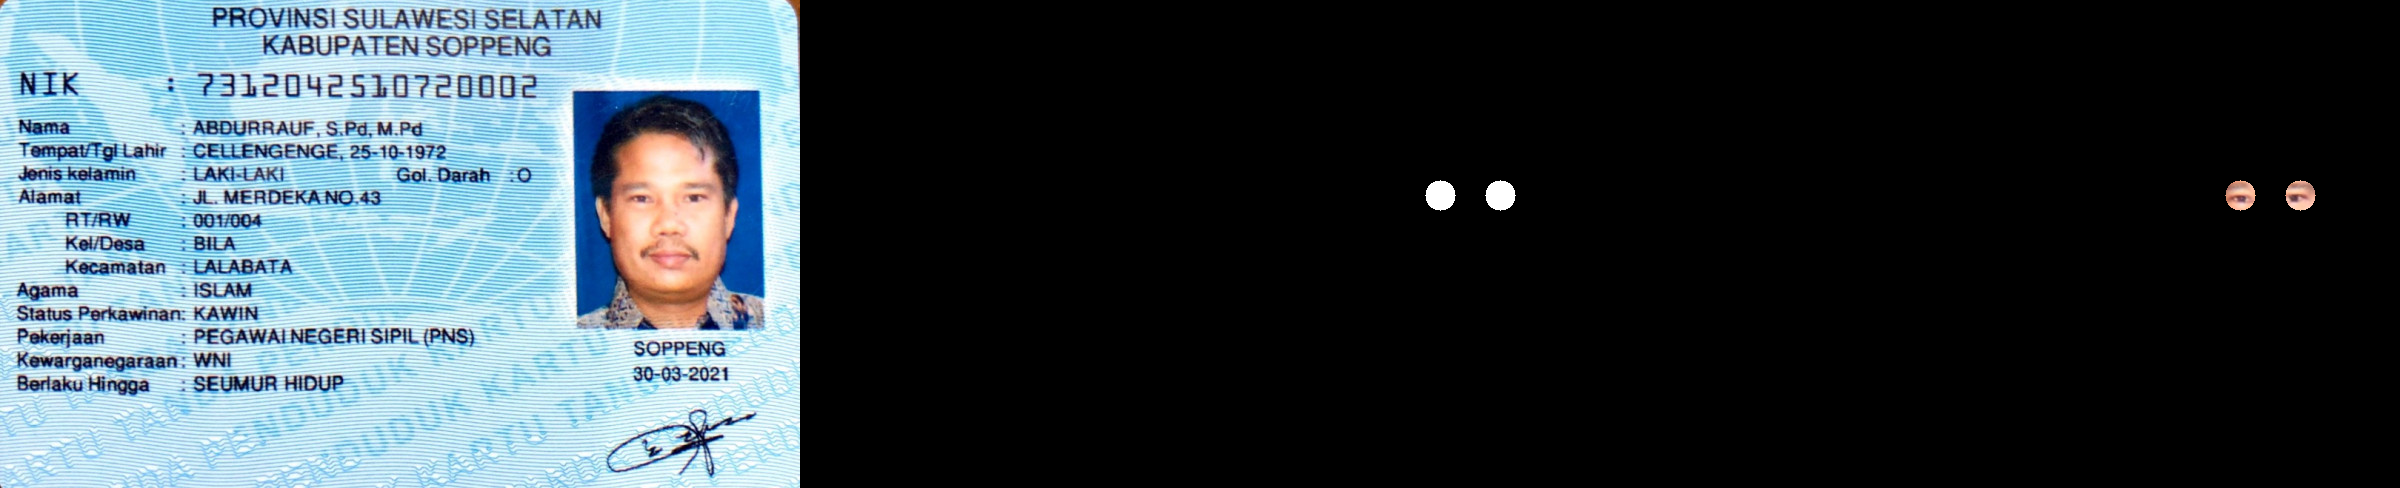

In [26]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_and(original, mask)

# Menggabungkan citra asli, mask, dan hasil AND bitwise
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)


## NAND

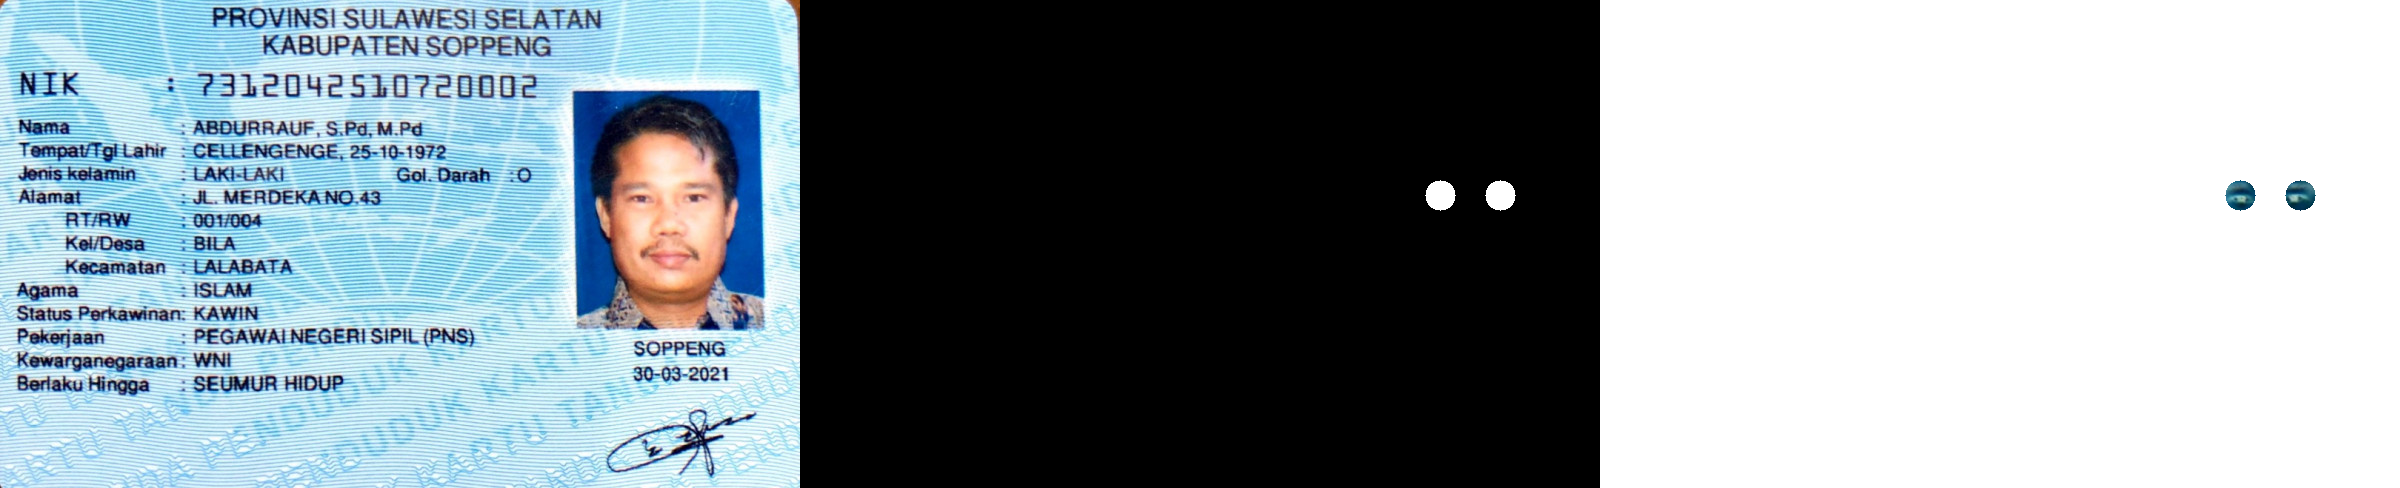

In [27]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
and_result = cv.bitwise_and(original, mask)

# Melakukan operasi AND bitwise antara gambar asli dan mask
nand_result = cv.bitwise_not(and_result)

# Menggabungkan citra asli, mask, dan hasil NAND bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, nand_result))

# Menampilkan hasil
cv2_imshow(final_frame)


## XOR

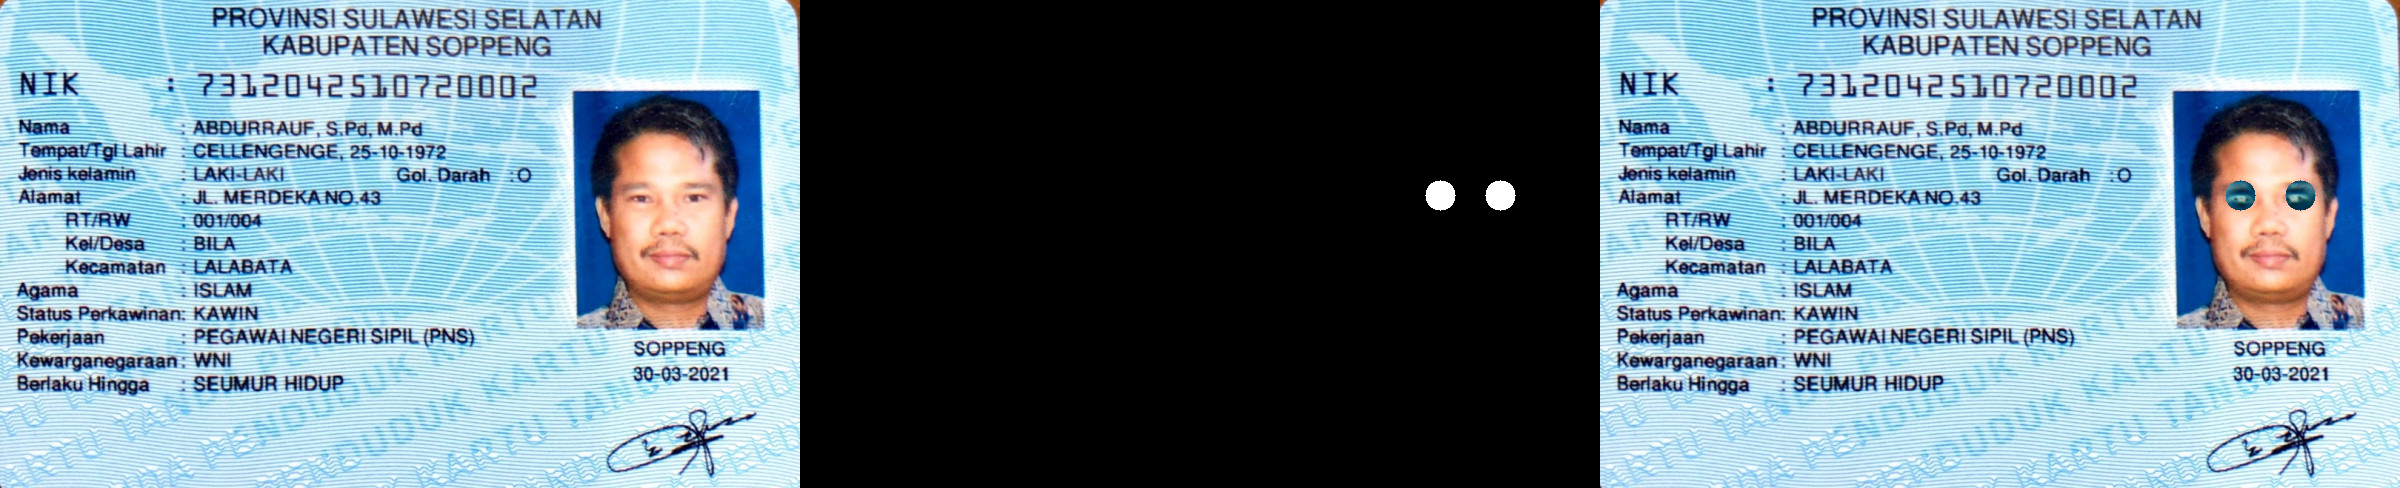

In [28]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_xor(original, mask)

# Menggabungkan citra asli, mask, dan hasil XOR bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)
